# Automatic Feature Selection

**Using SelectPercentile**

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()

In [3]:
rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data),50))

cancer_noise = np.hstack([cancer.data, noise])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer_noise, cancer.target, random_state = 42, test_size = 0.5)

In [5]:
select = SelectPercentile(percentile = 50)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

In [6]:
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


Text(0.5, 0, 'sample index')

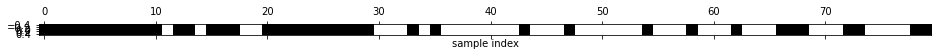

In [7]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel("sample index")

In [8]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)
print("score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("score with selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

score with all features: 0.940
score with selected features: 0.947


**Using SelectFromModel**

In [9]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [21]:
select = SelectFromModel(
                         RandomForestClassifier(n_estimators = 100, random_state = 42),
                         threshold = 'median')

In [22]:
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

In [23]:
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


Text(0.5, 0, 'Sample index')

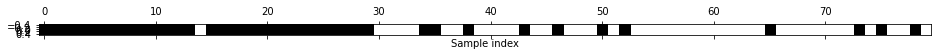

In [24]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel("Sample index")

In [25]:
X_test_selected = select.transform(X_test)
lr.fit(X_train_selected,y_train)
print("score with selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

score with selected features: 0.958


**Iterative Feature Selection**

Text(0.5, 0, 'sample index')

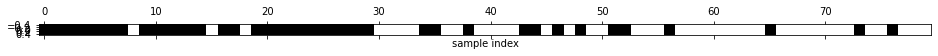

In [27]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42), n_features_to_select = 40)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('sample index')

In [29]:
X_test_selected = select.transform(X_test)

score = LogisticRegression(solver = 'liblinear').fit(X_train_selected, y_train).score(X_test_selected,y_test)
print("tests score: {:.3f}".format(score))

tests score: 0.958
